In [2]:
import matplotlib.pyplot as plt
import numpy as np

from main import * 

def chorin_cutoff(r, delta):
    return np.where(r > delta, 1, r / delta)

viscosity = 0.15
Re = 10000
L = 2*np.pi
domain = [[-L, L], [-L, 0.0]]

U_0 = viscosity * Re / L
def strength(xs: np.ndarray) -> np.ndarray:
    y = xs[..., 1]
    return np.full_like(y, -U_0)
    return U_0 * np.cos(y)

eps = 0.5
vortices = VectorisedRandomVortices.gen_rectangular_grid(
    parameter_domain = [[-L, L], [-L, -eps]],
    strength = strength,
    viscosity = viscosity,
    x_grid_size = 30,
    y_grid_size = 25,
    estimate_expectation=False,
    num_simulations=1
)
boundary_vortices = VectorisedRandomVortices.gen_rectangular_grid(
    parameter_domain = [domain[0], [-eps, 0]],
    strength = strength,
    viscosity = viscosity,
    x_grid_size = 30,
    y_grid_size = 15,
    estimate_expectation=False,
    num_simulations=1
)
vortices += boundary_vortices

def dd_phi(x: np.ndarray) -> np.ndarray:
    x = np.abs(x)[..., 1]
    return 54*3*2*(x-1/2) * ((x < 2/3) & (x > 1/3))

solver = Theorem2pt4(
    kernel=Kernel(chorin_cutoff, 0.2),
    random_vortices=vortices,
    timestep=0.01,
    dd_phi=dd_phi,
    eps=eps,
    periodic_boundary_conditions=True
)

from pyinstrument import Profiler

profiler = Profiler()
profiler.start()

# Code you want to profile
solver.run_simulation(iterations=100, iterations_per_frame=1)

profiler.stop()
print(profiler.output_text(unicode=True, color=True))


 13%|█▎        | 13/100 [00:08<00:52,  1.64it/s]

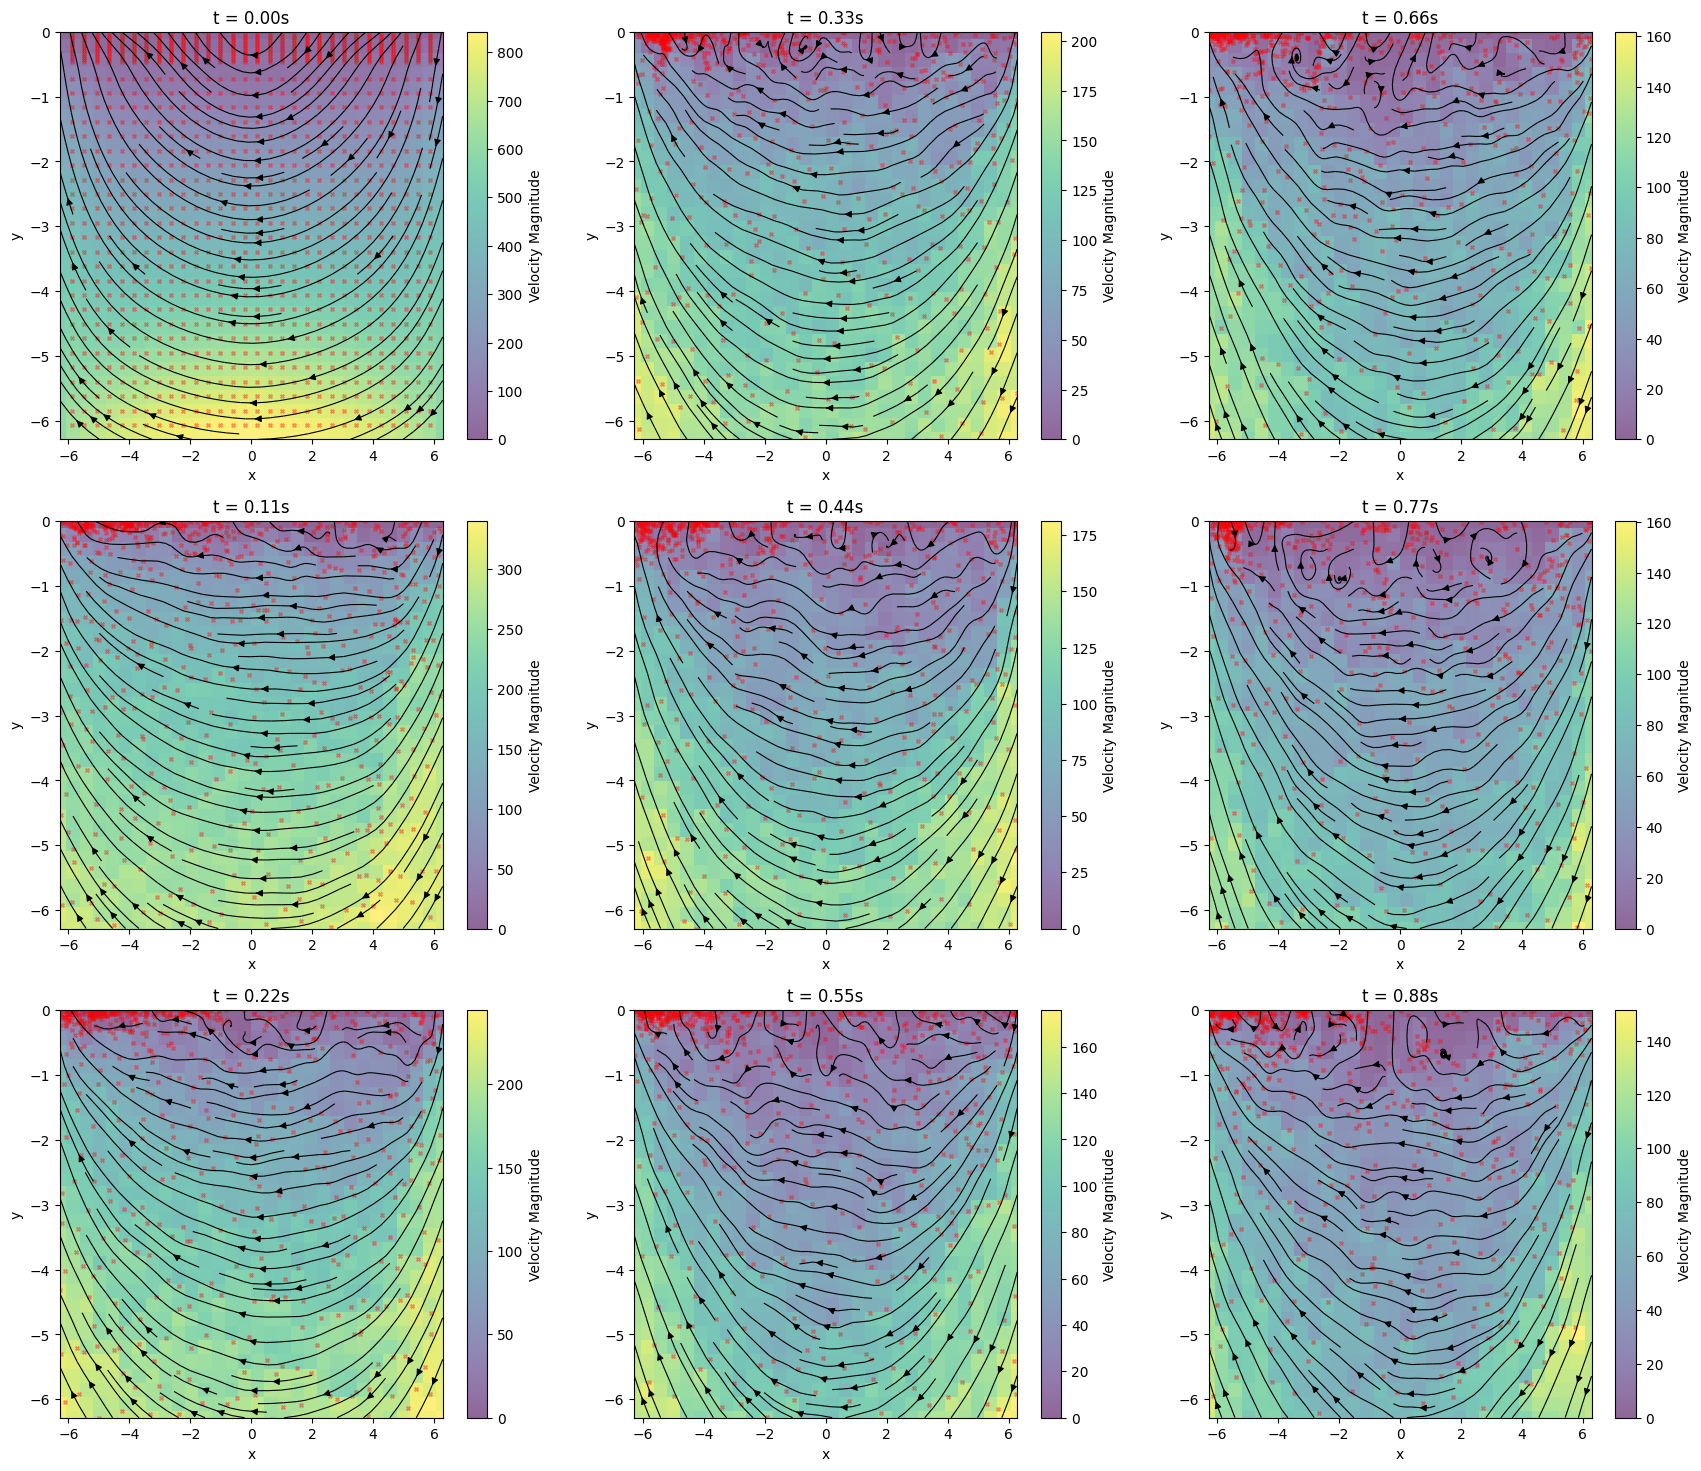

In [3]:
solver.state.plot_boundary_term = False
solver.state.use_quiver = False
solver.state.use_scatter = True
solver.state.use_velocity_cmap = True
solver.state.use_vorticity_cmap = False
solver.state.use_streamplot = True
solver.state.use_only_boundary_for_omega = True
solver.state.vortices.domain = [[-L, L], [-L, 0]]
solver.build_plot(3, 3)

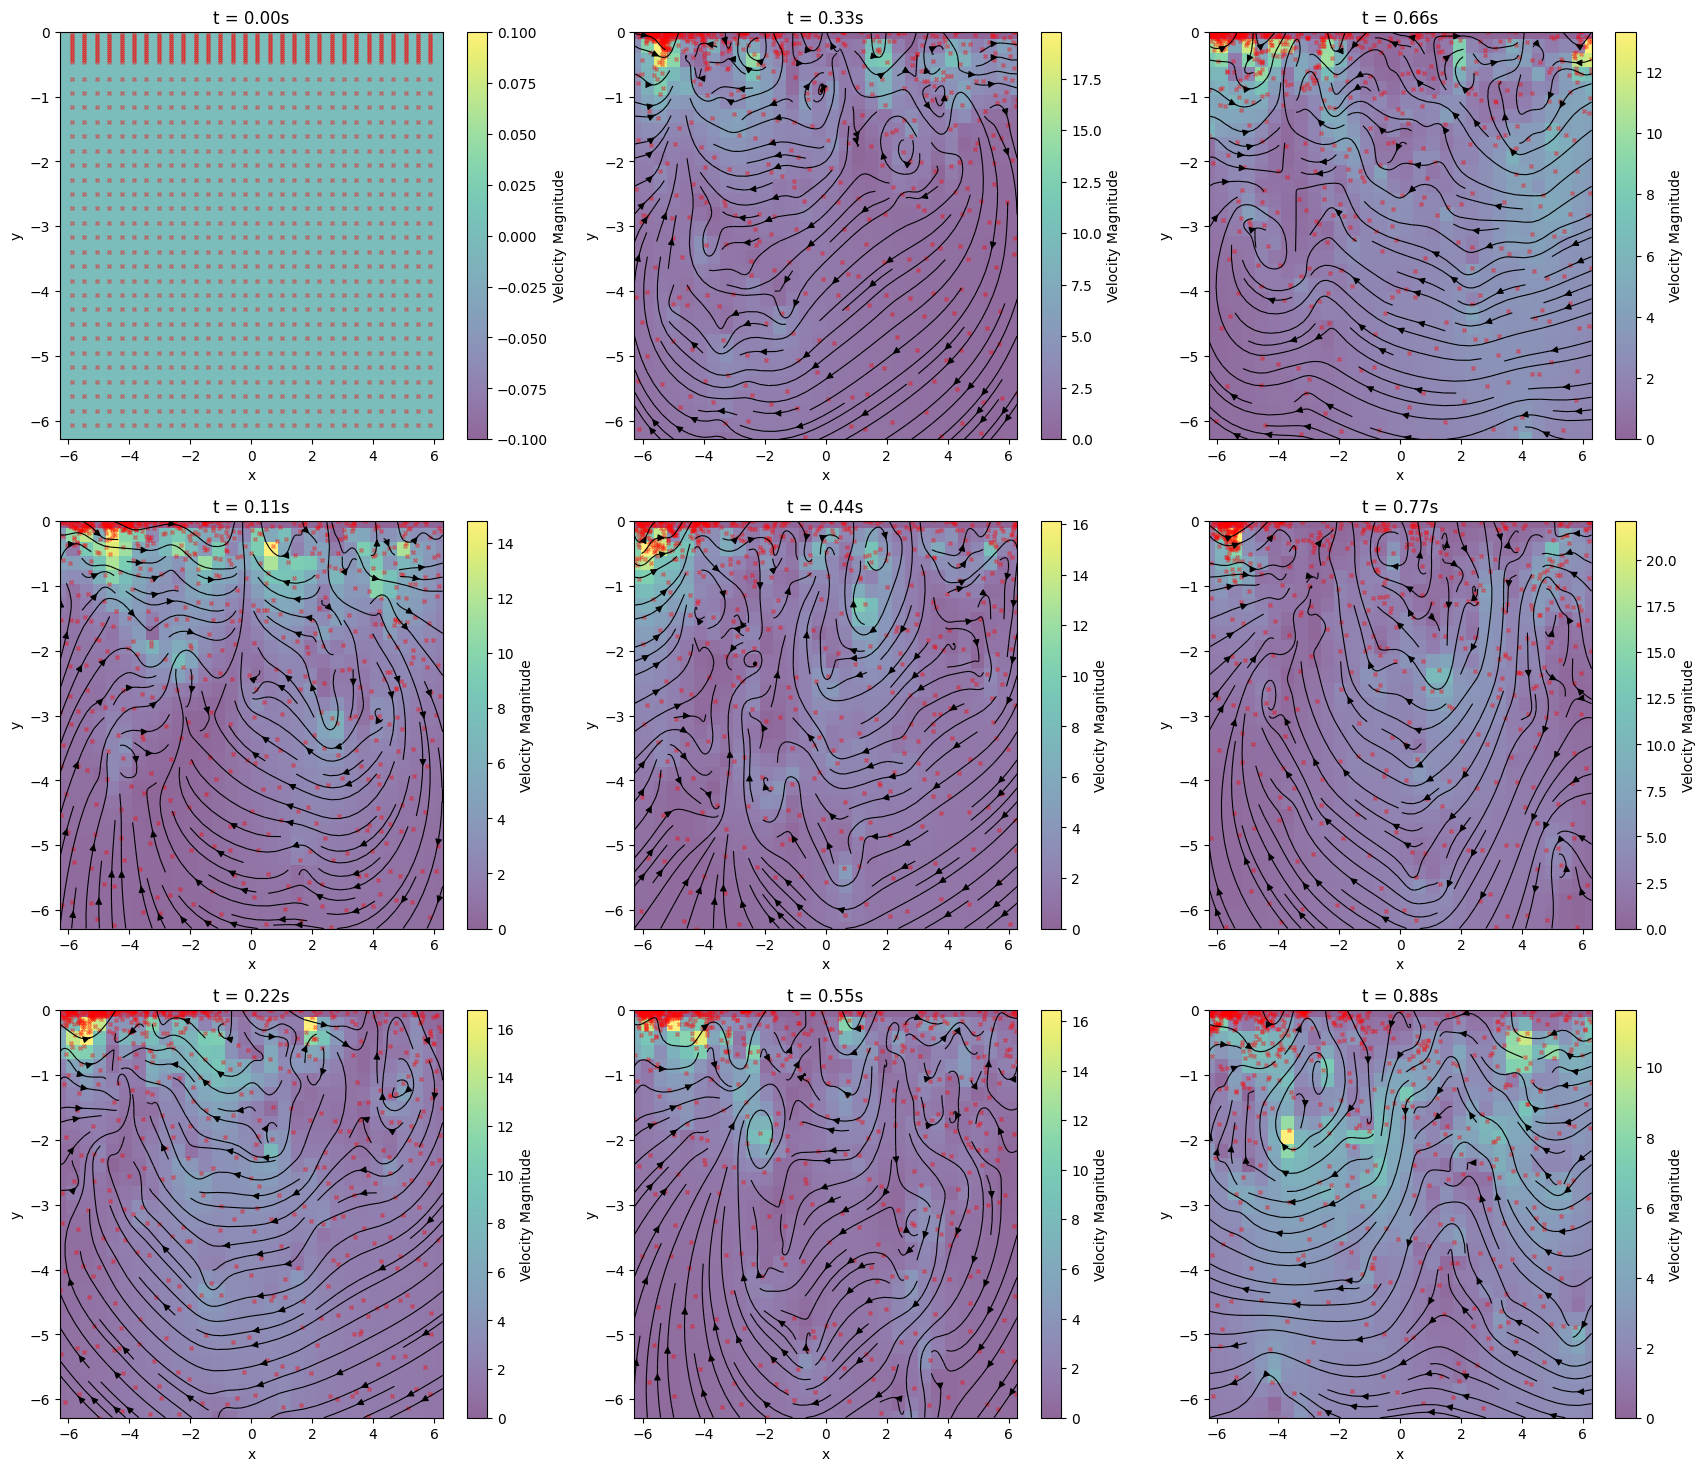

In [13]:
solver.state.plot_boundary_term = True
solver.state.use_quiver = False
solver.state.use_scatter = True
solver.state.use_velocity_cmap = True
solver.state.use_vorticity_cmap = False
solver.state.use_streamplot = True
solver.state.use_only_boundary_for_omega = False
solver.state.vortices.domain = [[-L, L], [-L, 0]]
solver.build_plot(3, 3)